# DBSCAN
另一个非常有用的聚类算法是 DBSCAN（density-based spatial clustering of applications with noise，即“具有噪声的基于密度的空间聚类应用”）。DBSCAN 的主要优点是它不需要用户先验 地设置簇的个数，可以划分具有复杂形状的簇，还可以找出不属于任何簇的点。DBSCAN 比凝聚聚类和 k 均值稍慢，但仍可以扩展到相对较大的数据集。

DBSCAN 的原理是识别特征空间的“拥挤”区域中的点，在这些区域中许多数据点靠近在一起。这些区域被称为特征空间中的密集 （dense）区域。DBSCAN 背后的思想是，簇形成数据的密集区域，并由相对较空的区域分隔开。

在密集区域内的点被称为核心样本 （core sample，或核心点），它们的定义如下。DBSCAN 有两个参数：min_samples 和 eps 。如果在距一个给定数据点 eps 的距离内至少有 min_samples 个数据点，那么这个数据点就是核心样本。DBSCAN 将彼此距离小于 eps 的核心样本放到同一个簇中。

算法首先任意选取一个点，然后找到到这个点的距离小于等于 eps 的所有的点。如果距起始点的距离在 eps 之内的数据点个数小于 min_samples ，那么这个点被标记为噪声 （noise），也就是说它不属于任何簇。如果距离在 eps 之内的数据点个数大于 min_samples ，则这个点被标记为核心样本，并被分配一个新的簇标签。然后访问该点的所有邻居（在距离 eps 以内）。如果它们还没有被分配一个簇，那么就将刚刚创建的新的簇标签分配给它们。如果它们是核心样本，那么就依次访问其邻居，以此类推。簇逐渐增大，直到在簇的 eps 距离内没有更多的核心样本为止。然后选取另一个尚未被访问过的点，并重复相同的过程。

最后，一共有三种类型的点：核心点、与核心点的距离在 eps 之内的点（叫作边界点 ，boundary point）和噪声。如果 DBSCAN 算法在特定数据集上多次运行，那么核心点的聚类始终相同，同样的点也始终被标记为噪声。但边界点可能与不止一个簇的核心样本相邻。因此，边界点所属的簇依赖于数据点的访问顺序。一般来说只有很少的边界点，这种对访问顺序的轻度依赖并不重要。

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [2]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [3]:
import mglearn

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


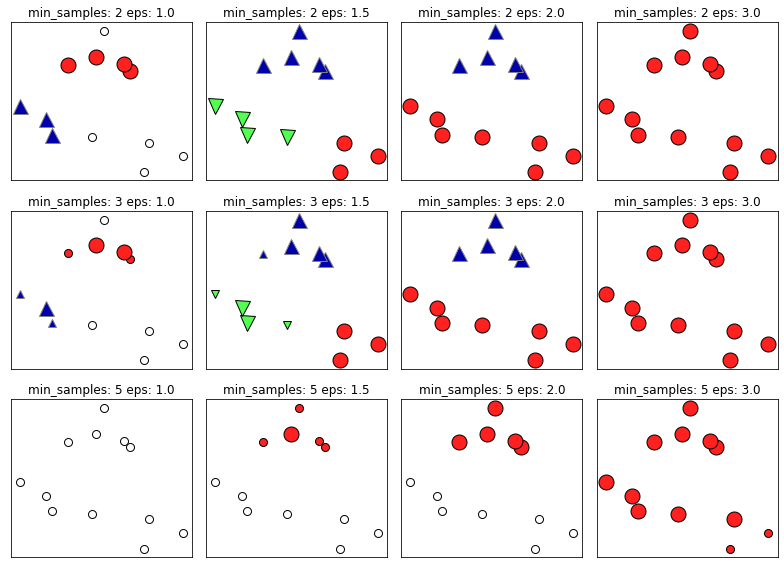

In [4]:
mglearn.plots.plot_dbscan()

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

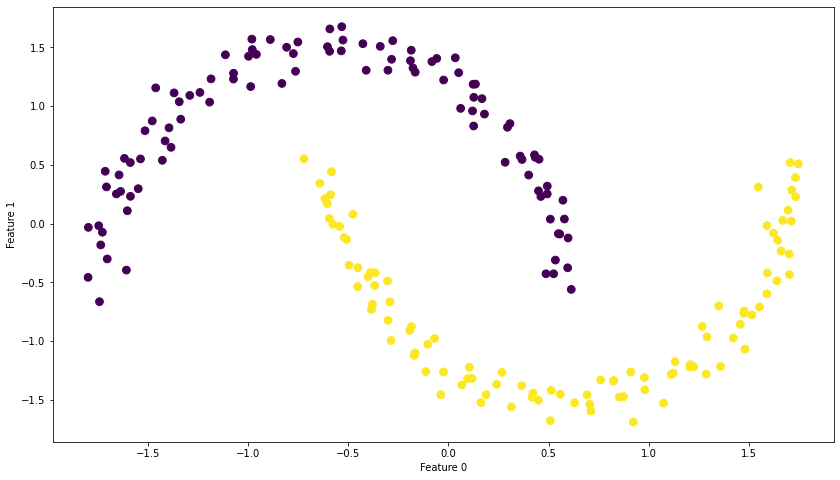

In [6]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 绘制簇分配
plt.figure(figsize=(14, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# 用真实值评估聚类

有一些指标可用于评估聚类算法相对于真实聚类的结果，其中最重要的是调整 rand 指数 （adjusted rand index，ARI）和归一化互信息 （normalized mutual information，NMI），二者都给出了定量的度量，其最佳值为 1，0 表示不相关的聚类（虽然 ARI 可以取负值）。

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

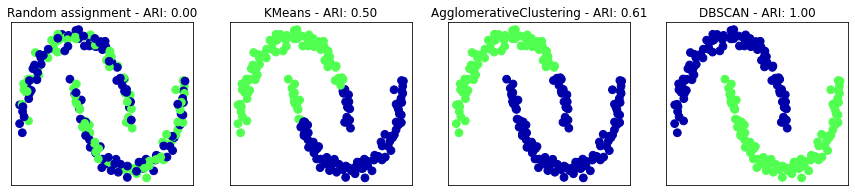

In [8]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# 列出要使用的算法
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 绘制簇分配和簇中心
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [9]:
from sklearn.metrics import accuracy_score

利用监督 ARI 分数在 two_moons 数据集上比较随机分配、k 均值、凝聚聚类和 DBSCAN

In [10]:
# 这两种点标签对应于相同的聚类
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 精度为0，因为二者标签完全不同
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 调整rand分数为1，因为二者聚类完全相同
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


有一些聚类的评分指标不需要真实值，比如轮廓系数 （silhouette coeffcient）。但它们在实践中的效果并不好。轮廓分数计算一个簇的紧致度，其值越大越好，最高分数为 1。虽然紧致的簇很好，但紧致度不允许复杂的形状。

In [11]:
from sklearn.metrics.cluster import silhouette_score

In [12]:
silhouette_score(X_scaled, clusters)

0.382386022679393